## Goal of the project:
- Use PCA to reduce the dimensions of a LFW dataset
- Understand the effect of number of components 
- Understand the limitations of PCA on a swiss roll

## Download the dataset

We will be working with Labeled Faces in the wild dataset which contains 13000 labeled images from 1680 different people. 


In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from sklearn.datasets import fetch_lfw_people

# load the data with following parameters
# lfw people dataset contains 13k+ images of 5k+ celebrities
# we will use all the images of 5k+ celebrities since we are doing unsupervised learning

DATA_HOME = "/Users/saip/My Drive/machine-learning-fundamentals/datasets"

faces = fetch_lfw_people(data_home=DATA_HOME, min_faces_per_person=60, resize=0.4)

# print the shape of the data
print("Shape of the data: {}".format(faces.data.shape))

# print the number of unique classes
print("Number of unique classes: {}".format(len(set(faces.target))))

# print the target names
print("Target names: {}".format(faces.target_names))

# print the shape of the images
print("Shape of the images: {}".format(faces.images.shape))

Shape of the data: (1348, 1850)
Number of unique classes: 8
Target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Shape of the images: (1348, 50, 37)


## Data Exploration

Print the statistics
Check for the distribution of labels
Check for any missing features or labels. 
Check for any outliers. - not needed for images
Check for correlation among features. - not needed for images
Do we need to normalize the features? 

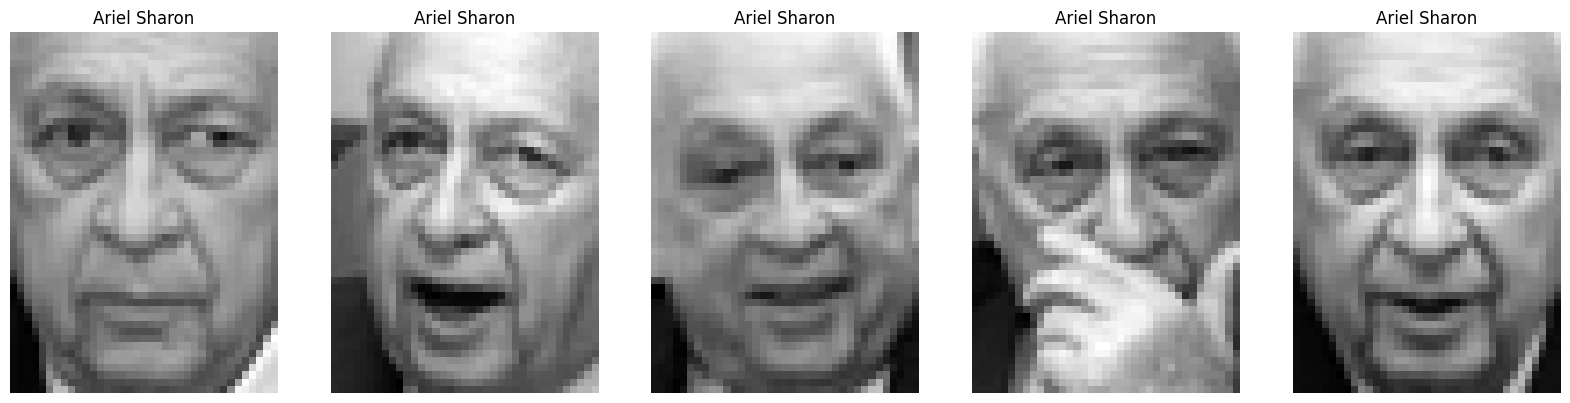

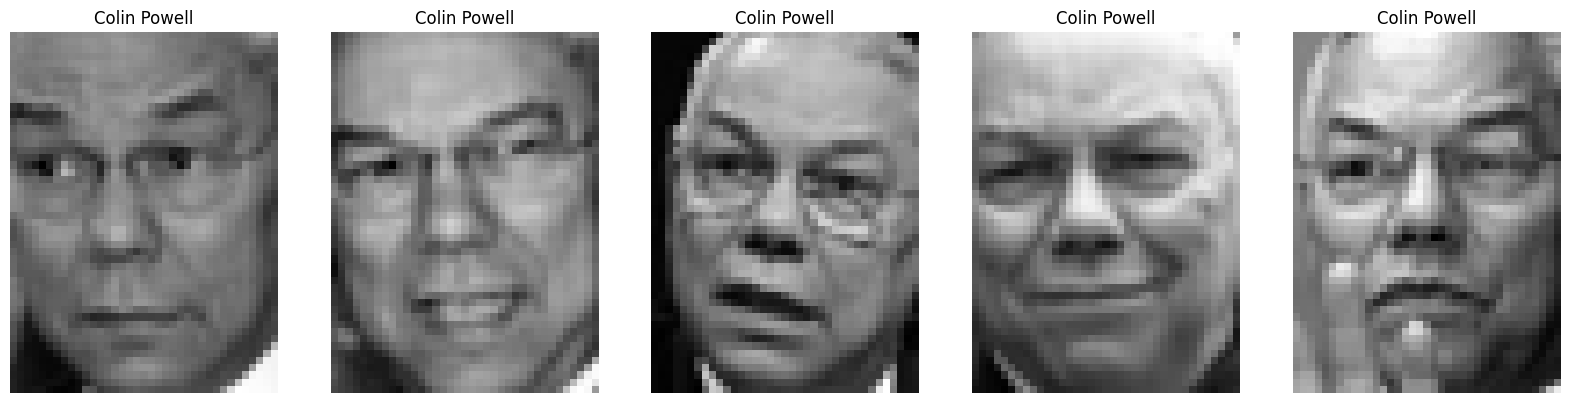

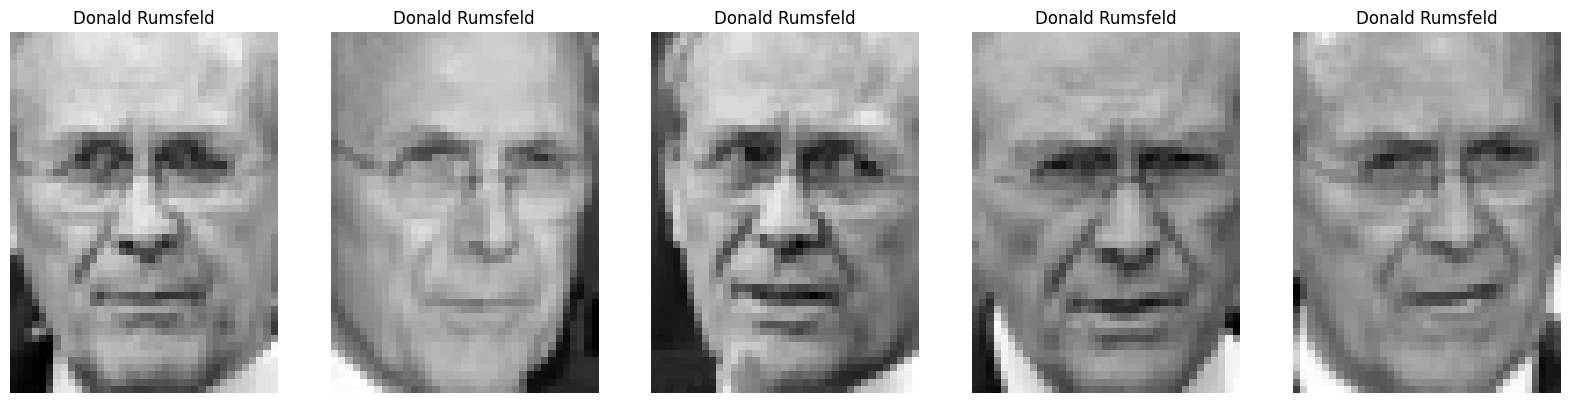

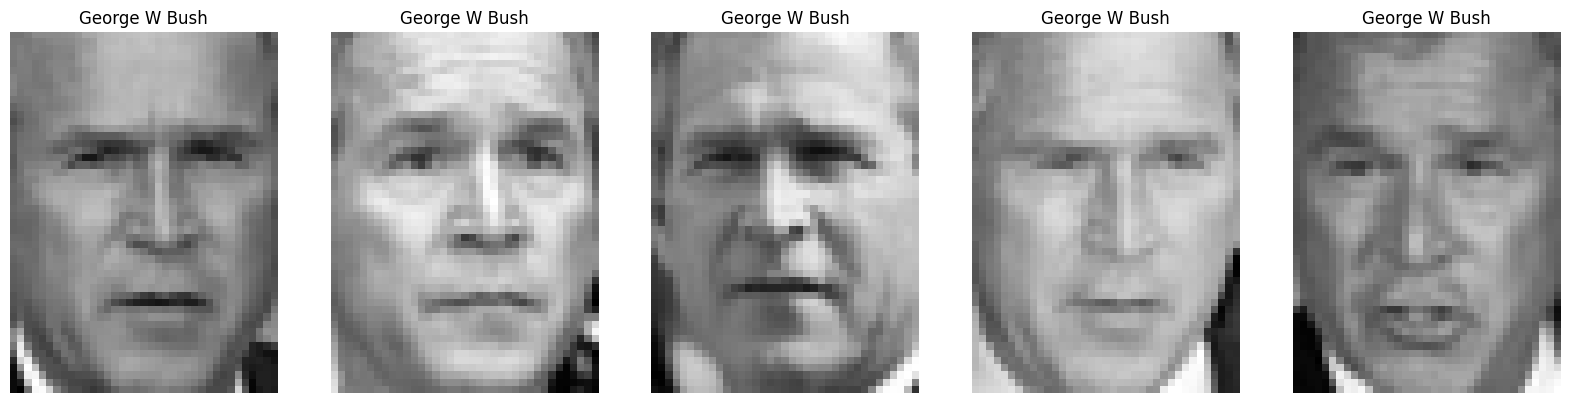

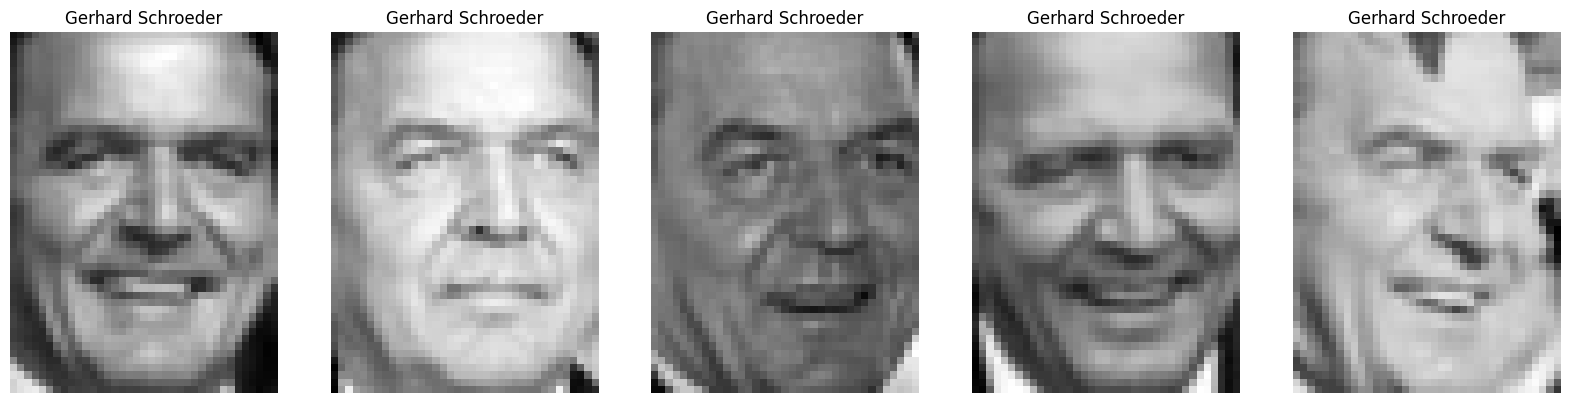

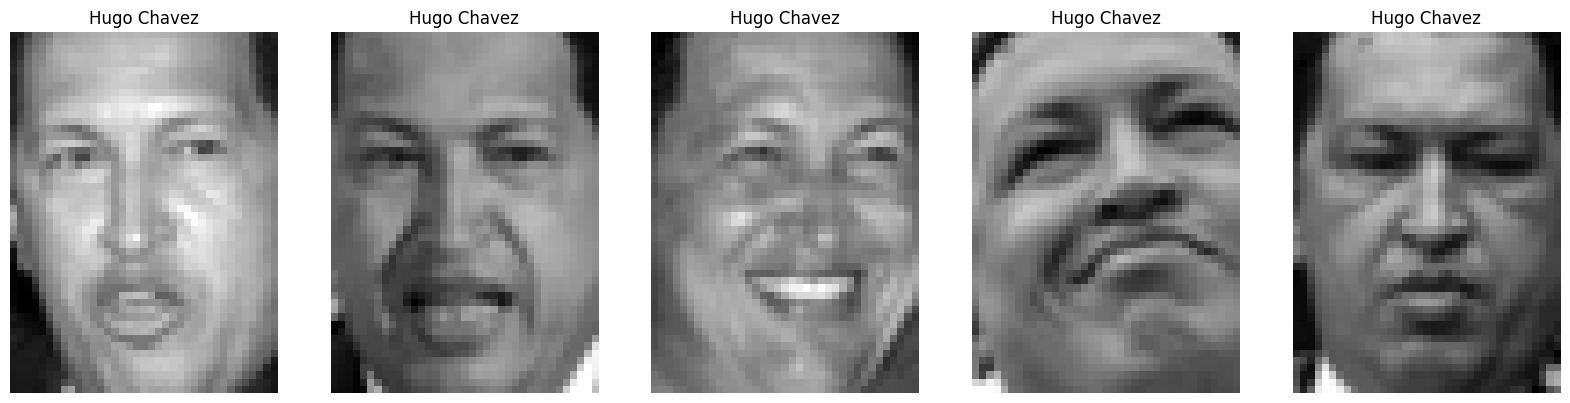

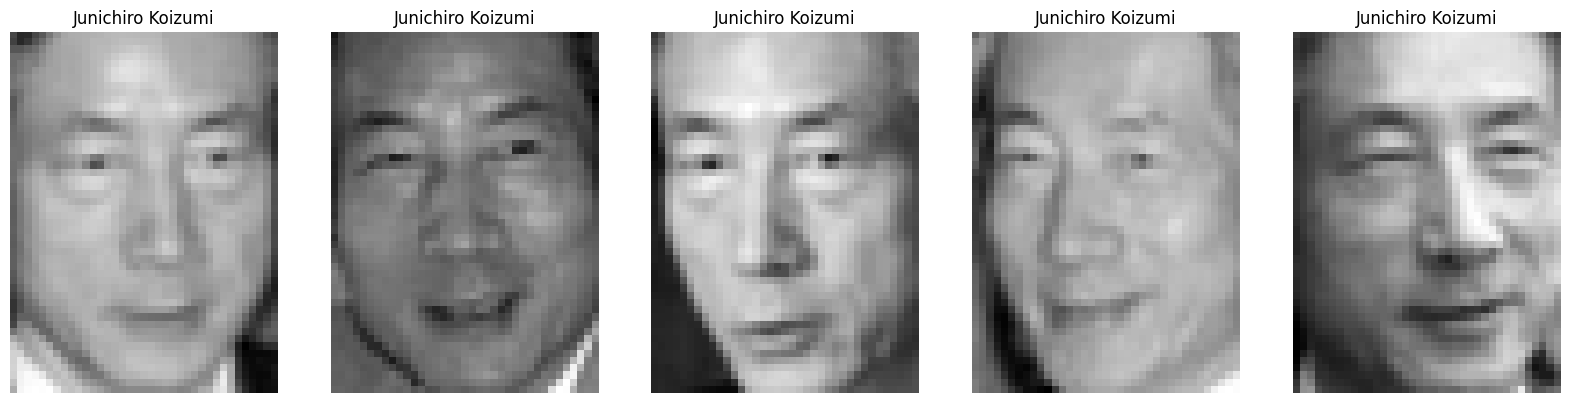

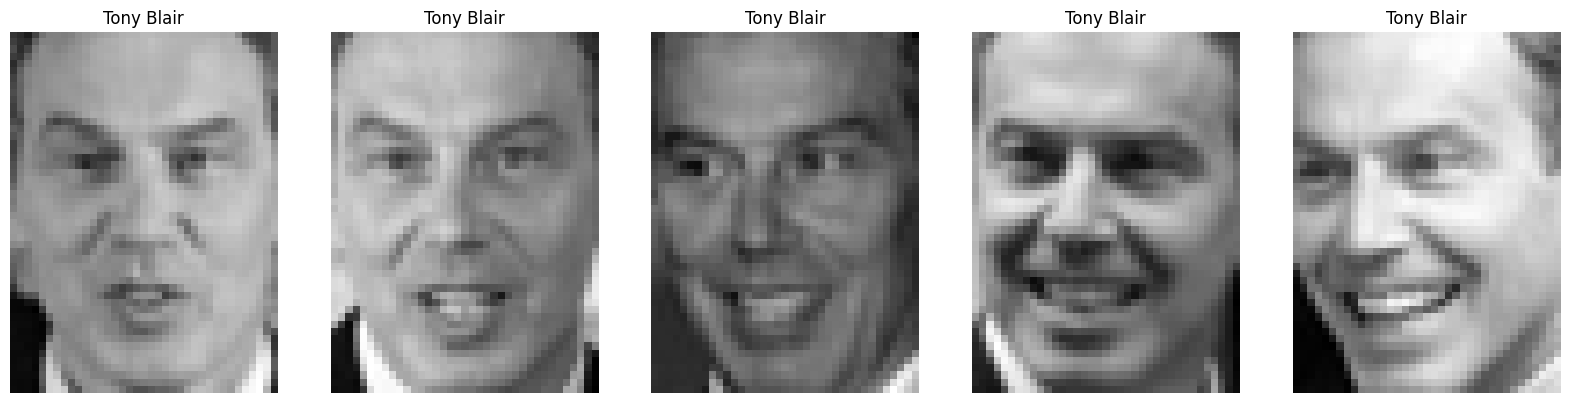

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# pick 5 images of each celebrity randomly and plot them
for celeb in faces.target_names:
    # get the indices of the images of the current celebrity
    indices = np.where(faces.target_names[faces.target] == celeb)[0]
    # pick 5 random indices
    random_indices = np.random.choice(indices, 5)
    # plot the images
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(faces.images[random_indices[i]], cmap='gray')
        ax.set_title(celeb)
        ax.axis('off')
    plt.show()


The images are taken from various angles, different lighting conditions, different expressions. 

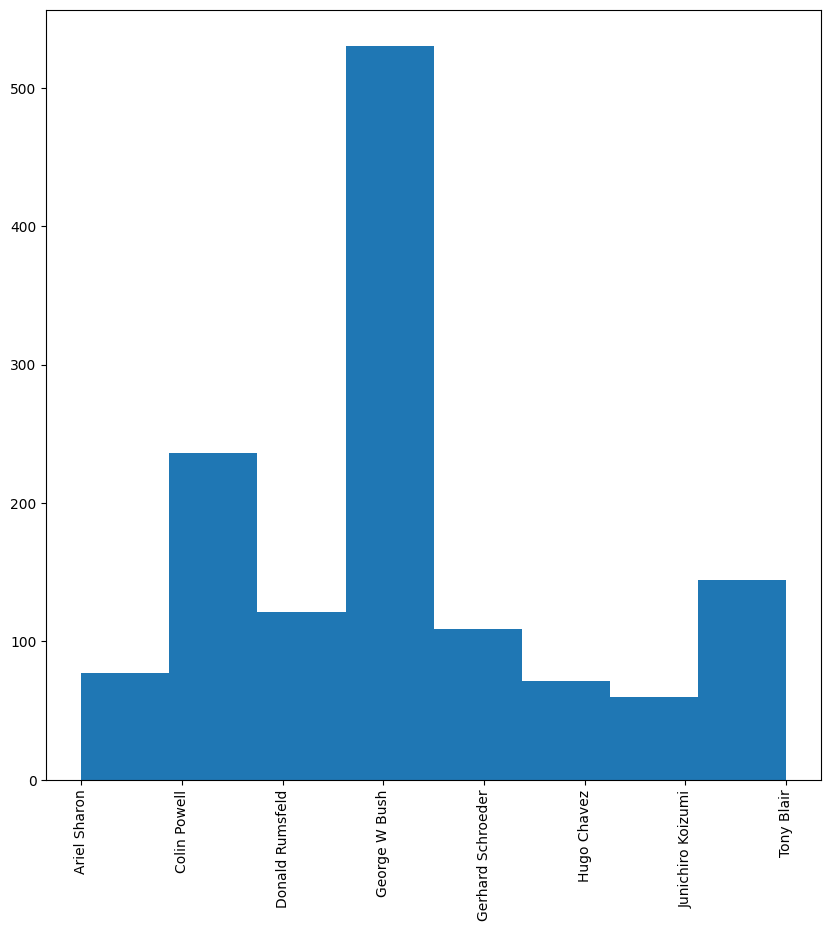

In [9]:
# plot the distribution of the classes
# also name the classes
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(faces.target, bins=len(set(faces.target)))
ax.set_xticks(list(range(len(set(faces.target)))))
ax.set_xticklabels(faces.target_names, rotation=90)
plt.show()

In [30]:
# split the data into train and test with stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target, random_state=42)

# print the shape of the train and test data
print("Shape of the train data: {}".format(X_train.shape))
print("Shape of the test data: {}".format(X_test.shape))

Shape of the train data: (1011, 1850)
Shape of the test data: (337, 1850)


##Effect of centering on PCA components

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 2D dataset
np.random.seed(0)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T + 10

# Compute the covariance matrix and its eigenvalues and eigenvectors
cov_matrix = np.cov(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the eigenvectors (PCA directions)
print("PCA directions without centering: \n", eigenvectors)

# Center the data
X_centered = X - np.mean(X, axis=0)

# Compute the covariance matrix and its eigenvalues and eigenvectors for the centered data
cov_matrix_centered = np.cov(X_centered, rowvar=False)
eigenvalues_centered, eigenvectors_centered = np.linalg.eig(cov_matrix_centered)

# Print the eigenvectors (PCA directions) for the centered data
print("PCA directions with centering: \n", eigenvectors_centered)

PCA directions without centering: 
 [[ 0.739393   -0.67327408]
 [ 0.67327408  0.739393  ]]
PCA directions with centering: 
 [[ 0.739393   -0.67327408]
 [ 0.67327408  0.739393  ]]


Centering doesn't affect the directions of the PCA. 
To get the final features however, we need to center the data and project them onto the PCA components. 

## Effect of scaling

PCA directions without centering or scaling: 
 [[ 0.739393   -0.67327408]
 [ 0.67327408  0.739393  ]]
PCA directions with centering: 
 [[ 0.739393   -0.67327408]
 [ 0.67327408  0.739393  ]]
PCA directions with scaling: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


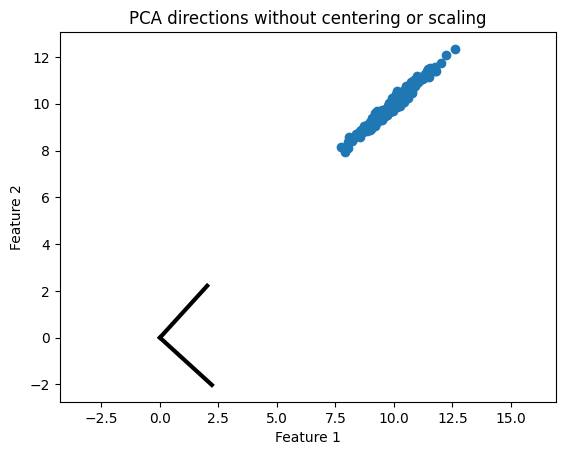

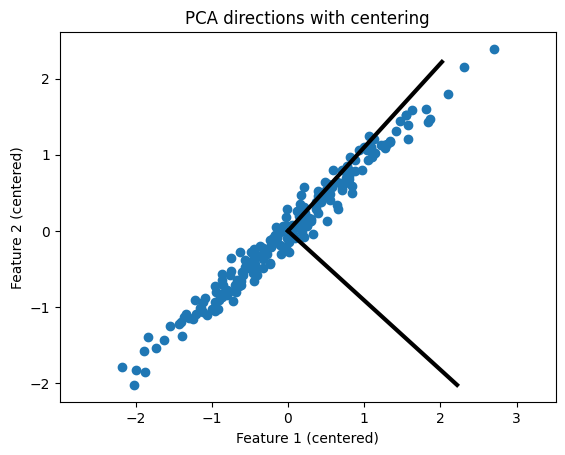

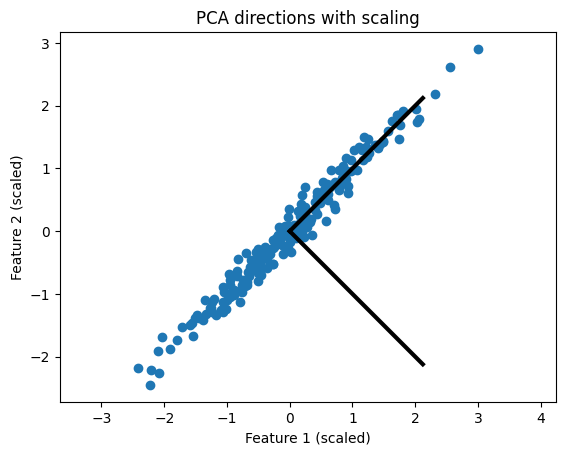

In [42]:
# Create a simple 2D dataset
np.random.seed(0)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T + 10

# Compute the covariance matrix and its eigenvalues and eigenvectors
cov_matrix = np.cov(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the eigenvectors (PCA directions)
print("PCA directions without centering or scaling: \n", eigenvectors)

# Plot the data and the PCA directions
plt.scatter(X[:, 0], X[:, 1])
for vector in eigenvectors:
    v = vector * 3
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')
plt.title('PCA directions without centering or scaling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Center the data
X_centered = X - np.mean(X, axis=0)

# Compute the covariance matrix and its eigenvalues and eigenvectors for the centered data
cov_matrix_centered = np.cov(X_centered, rowvar=False)
eigenvalues_centered, eigenvectors_centered = np.linalg.eig(cov_matrix_centered)

# Print the eigenvectors (PCA directions) for the centered data
print("PCA directions with centering: \n", eigenvectors_centered)

# Plot the centered data and the PCA directions
plt.figure()
plt.scatter(X_centered[:, 0], X_centered[:, 1])
for vector in eigenvectors_centered:
    v = vector * 3
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')
plt.title('PCA directions with centering')
plt.xlabel('Feature 1 (centered)')
plt.ylabel('Feature 2 (centered)')

# Scale the data
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Compute the covariance matrix and its eigenvalues and eigenvectors for the scaled data
cov_matrix_scaled = np.cov(X_scaled, rowvar=False)
eigenvalues_scaled, eigenvectors_scaled = np.linalg.eig(cov_matrix_scaled)

# Print the eigenvectors (PCA directions) for the scaled data
print("PCA directions with scaling: \n", eigenvectors_scaled)

# Plot the scaled data and the PCA directions
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
for vector in eigenvectors_scaled:
    v = vector * 3
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')
plt.title('PCA directions with scaling')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

Centering the data, which involves subtracting the mean from each feature, does not alter the principal components derived from PCA (Principal Component Analysis). However, scaling the features does have an impact. Each principal component in PCA accounts for a portion of the total variance in the dataset. This total variance is essentially the sum of the variances of individual features.

Certain features might inherently have higher or lower values and, as a result, contribute more or less to the overall variance. Scaling, which typically involves adjusting features to have a range between 0 and 1, ensures that all features contribute equally to the analysis. This process of normalization is crucial in PCA as it prevents features with larger magnitudes from disproportionately influencing the resulting components. 

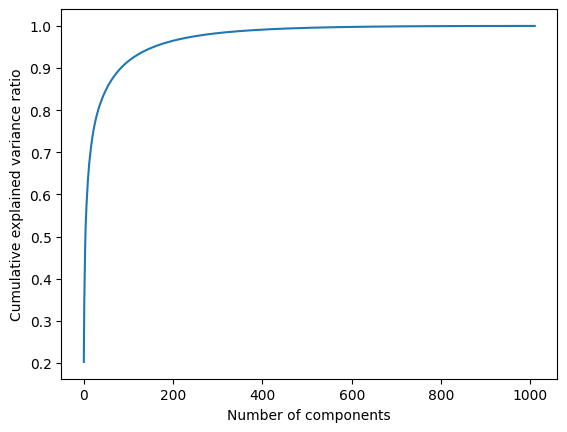

In [51]:

from sklearn.decomposition import PCA

# center the data, scaling is not required since all the features are in the same scale
X_train_centered = X_train - np.mean(X_train, axis=0)

# fit PCA on the train data and plot cumulative explained variance ratio
pca = PCA().fit(X_train_centered)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

Number of components required to explain 0.99 of variance: 382
Number of components required to explain 0.95 of variance: 158
Number of components required to explain 0.8 of variance: 34
Number of components required to explain 0.5 of variance: 5


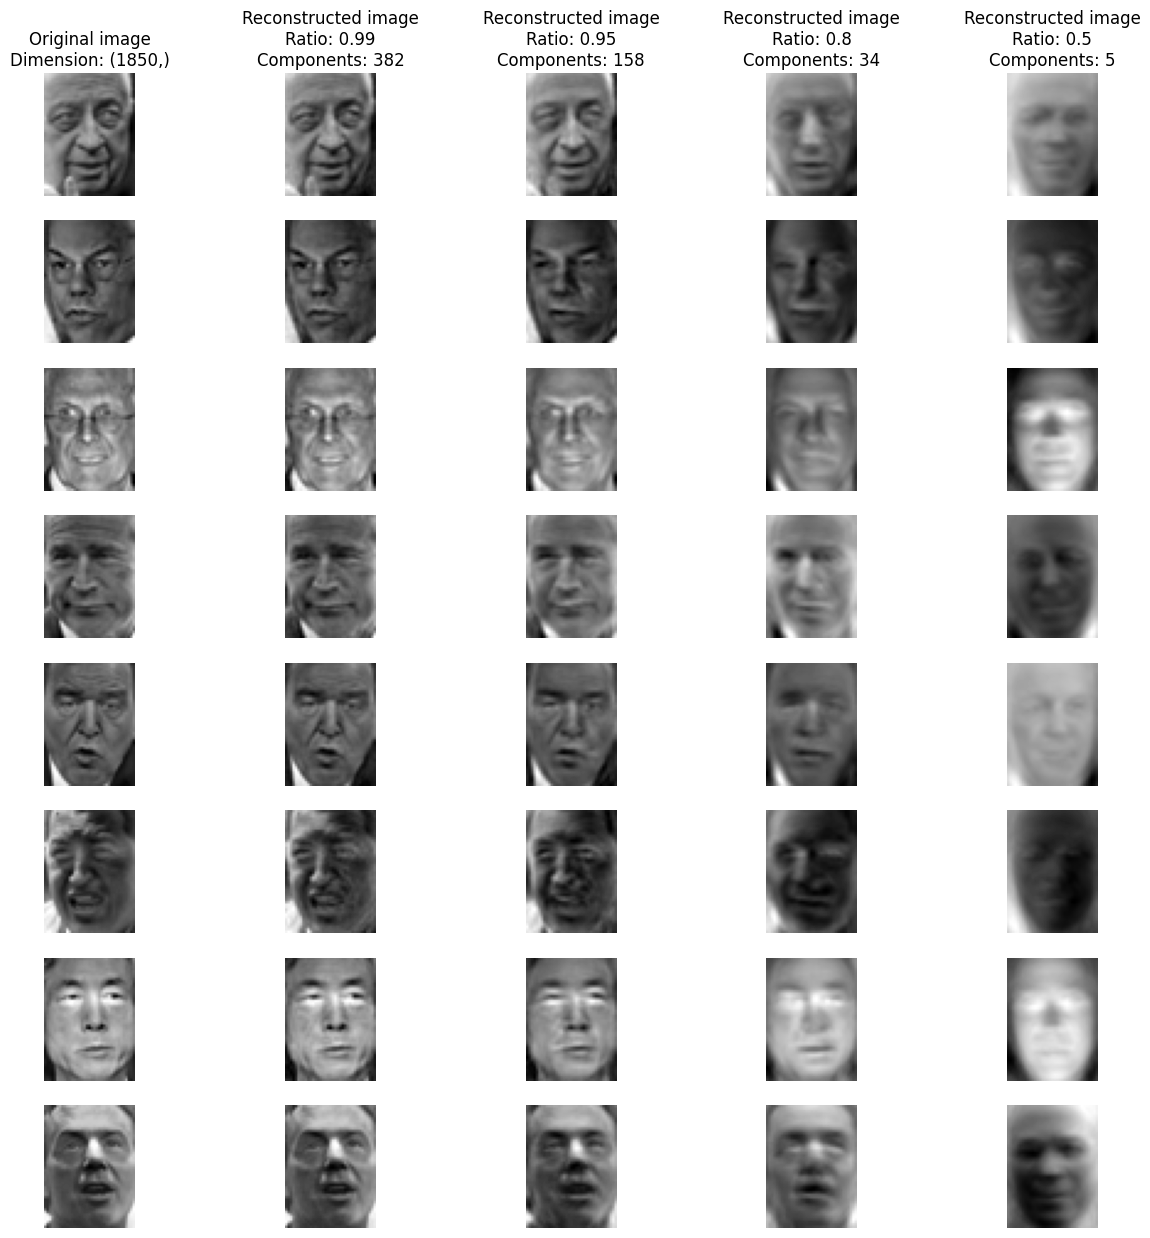

In [83]:
# various ratios
ratios = [0.99, 0.95, 0.80, 0.50]

# pick a picture from each target
# the following code picks the first image of each target
indices = []
for i in range(len(set(y_train))):
    indices.append(np.where(y_train == i)[0][0])


# initialize the plt.subplots object
# the original and reconstructed images will be plotted in the same row
fig, axes = plt.subplots(len(set(y_train)), len(ratios)+1, figsize=(15, 15))

# plot the original images
for i, ax in enumerate(axes[:, 0]):
    ax.imshow(X_train_centered[indices[i]].reshape(50, 37), cmap='gray')
    # include the name of the celebrity, dimension of the image
    if i==0:
        ax.set_title("Original image\nDimension: {}".format(X_train_centered[indices[i]].shape))

    ax.axis('off')

# plot the reconstructed images for various explained variance ratios
for i, ratio in enumerate(ratios):
    # find the number of components required to explain the given ratio
    n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= ratio)[0][0] + 1
    print("Number of components required to explain {} of variance: {}".format(ratio, n_components))
    # loop through the images
    for j in range(len(indices)):
        # transform the data
        X_transformed = pca.transform(X_train_centered[indices[j]].reshape(1, -1))
        # set the components that are not required to zero
        X_transformed[:, n_components:] = 0
        # inverse transform the data
        X_reconstructed = pca.inverse_transform(X_transformed)

        # plot the reconstructed images
        ax = axes[j, i+1]
        ax.imshow(X_reconstructed.reshape(50, 37), cmap='gray')
        if j==0:
            # include the ratio and n_components in the title
            ax.set_title("Reconstructed image\nRatio: {}\nComponents: {}".format(ratio, n_components))
        ax.axis('off')

    


With just 1/5 of the dimensions, we can explain 99% of the variance in the features. In some images, the degradation is pretty evident while in others, not so much

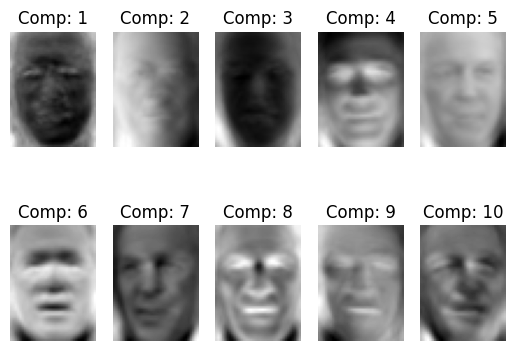

In [79]:
# plot the first 10 components
fig, axes = plt.subplots(2, 5)
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')
    ax.set_title("Comp: {}".format(i+1))
    ax.axis('off')
# reduce the vertical space between the subplots
plt.subplots_adjust(hspace=0.1)
plt.show()

## Limitations of PCA

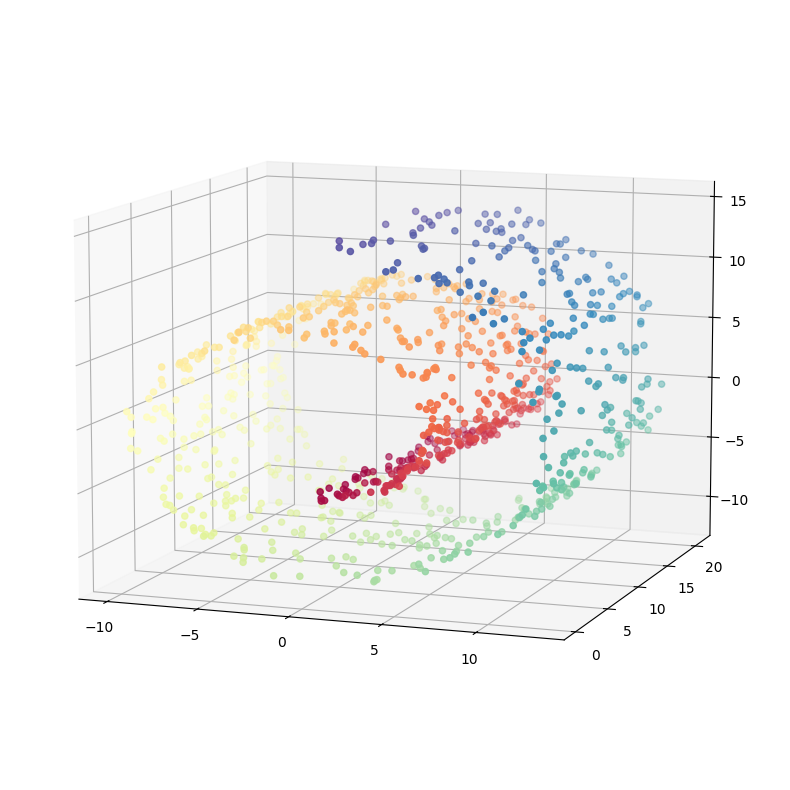

In [85]:
# create a swiss roll dataset
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# plot the swiss roll
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
ax.view_init(10, -70)
plt.show()


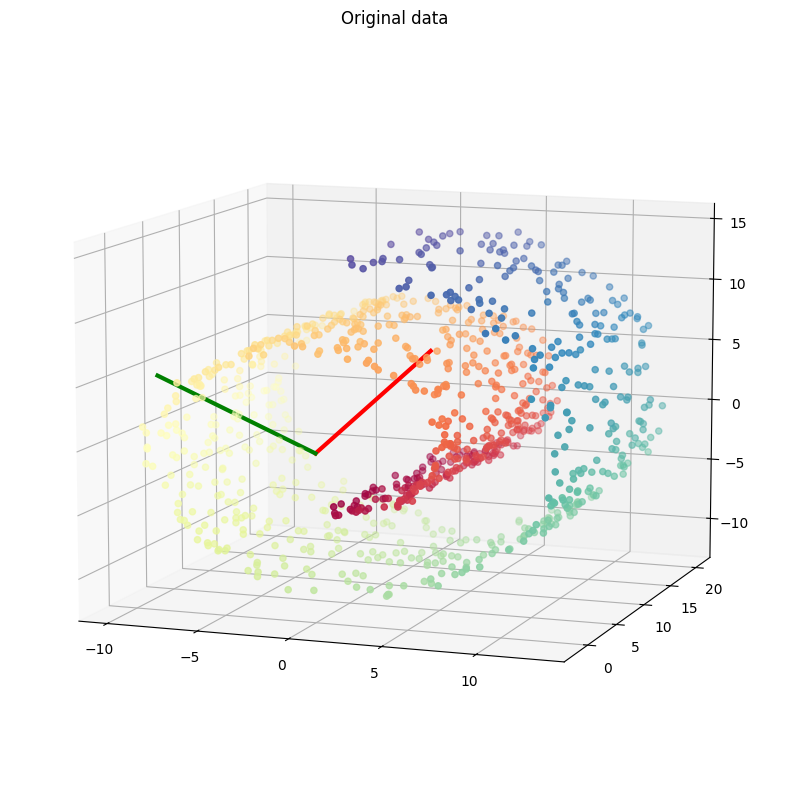

In [96]:
# use PCA to reduce the dimensionality of the swiss roll
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# plot the swiss roll in 3D and plot the first two components in the same figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
# first principal component
v = pca.components_[0] * 10
# plot it in red color
ax.plot([0, v[0]], [0, v[1]], [0, v[2]], lw=3, color='red')
# second principal component
v = pca.components_[1] * 10
# plot it in green color
ax.plot([0, v[0]], [0, v[1]], [0, v[2]], lw=3, color='green')

ax.view_init(10, -70)
ax.set_title("Original data")
plt.show()







Since, PCA principal components is a linear method, neither of the components capture the rolled up structure of the swiss roll dataset. 